In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Here I am importing the csv file which holds the hourly DA prices for the BZ NO2
BZNO2DA2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_NO2_20210101-20211231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZNO2DA2021 = BZNO2DA2021.replace('n/e', np.NaN)
BZNO2DA2021 = BZNO2DA2021.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZNO2DA2021 = {'MTU (CET/CEST)': BZNO2DA2021.iloc[:,0],
    'DAPrice': BZNO2DA2021.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZNO2DA2021['DAPrice'] = pd.to_numeric(BZNO2DA2021['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZNO2DA2021 = pd.DataFrame(BZNO2DA2021)
print(BZNO2DA2021.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2021 00:00 - 01.01.2021 01:00    24.95
1     01.01.2021 01:00 - 01.01.2021 02:00    24.35
2     01.01.2021 02:00 - 01.01.2021 03:00    23.98
3     01.01.2021 03:00 - 01.01.2021 04:00    23.72
4     01.01.2021 04:00 - 01.01.2021 05:00    23.73
5     01.01.2021 05:00 - 01.01.2021 06:00    24.06
6     01.01.2021 06:00 - 01.01.2021 07:00    24.44
7     01.01.2021 07:00 - 01.01.2021 08:00    24.93
8     01.01.2021 08:00 - 01.01.2021 09:00    24.90
9     01.01.2021 09:00 - 01.01.2021 10:00    25.07
10    01.01.2021 10:00 - 01.01.2021 11:00    25.63
11    01.01.2021 11:00 - 01.01.2021 12:00    25.92
12    01.01.2021 12:00 - 01.01.2021 13:00    26.13
13    01.01.2021 13:00 - 01.01.2021 14:00    26.57
14    01.01.2021 14:00 - 01.01.2021 15:00    27.30
15    01.01.2021 15:00 - 01.01.2021 16:00    28.61
16    01.01.2021 16:00 - 01.01.2021 17:00    29.35
17    01.01.2021 17:00 - 01.01.2021 18:00    29.30
18    01.01.2021 18:00 - 01.01.

In [3]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZNO2DA2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = BZNO2DA2021.iloc[start,0]
            operation = statistics.mean(BZNO2DA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 86:
            start = 24*i
            skip = 2066
            end = 2088
            a = sum(BZNO2DA2021.iloc[start:skip,1])
            b = sum(BZNO2DA2021.iloc[skip+1:end,1])
            day = BZNO2DA2021.iloc[start,0]
            operation = (a+b)/(len(BZNO2DA2021.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = BZNO2DA2021.iloc[start,0]
            operation = statistics.mean(BZNO2DA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 303:
            start = 24*i
            end = 7297
            day = BZNO2DA2021.iloc[start,0]
            operation = statistics.mean(BZNO2DA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZNO2DA2021.iloc[start,0]
            operation = statistics.mean(BZNO2DA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZNO2DA2021Daily = function()
BZNO2DA2021Daily["Daily DA"] = BZNO2DA2021Daily["Daily DA"].round(2)
print(BZNO2DA2021Daily.to_string())

                                     Day  Daily DA
0    01.01.2021 00:00 - 01.01.2021 01:00     26.10
1    02.01.2021 00:00 - 02.01.2021 01:00     26.85
2    03.01.2021 00:00 - 03.01.2021 01:00     25.78
3    04.01.2021 00:00 - 04.01.2021 01:00     41.61
4    05.01.2021 00:00 - 05.01.2021 01:00     46.02
5    06.01.2021 00:00 - 06.01.2021 01:00     41.06
6    07.01.2021 00:00 - 07.01.2021 01:00     67.41
7    08.01.2021 00:00 - 08.01.2021 01:00     76.62
8    09.01.2021 00:00 - 09.01.2021 01:00     55.18
9    10.01.2021 00:00 - 10.01.2021 01:00     42.02
10   11.01.2021 00:00 - 11.01.2021 01:00     41.60
11   12.01.2021 00:00 - 12.01.2021 01:00     44.83
12   13.01.2021 00:00 - 13.01.2021 01:00     42.10
13   14.01.2021 00:00 - 14.01.2021 01:00     70.41
14   15.01.2021 00:00 - 15.01.2021 01:00     72.69
15   16.01.2021 00:00 - 16.01.2021 01:00     54.54
16   17.01.2021 00:00 - 17.01.2021 01:00     52.41
17   18.01.2021 00:00 - 18.01.2021 01:00     54.52
18   19.01.2021 00:00 - 19.01.2

In [4]:
BZNO2DA2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_NO2_20220101-20221231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZNO2DA2022 = BZNO2DA2022.replace('n/e', np.NaN)
BZNO2DA2022 = BZNO2DA2022.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZNO2DA2022 = {'MTU (CET/CEST)': BZNO2DA2022.iloc[:,0],
    'DAPrice': BZNO2DA2022.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZNO2DA2022['DAPrice'] = pd.to_numeric(BZNO2DA2022['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZNO2DA2022 = pd.DataFrame(BZNO2DA2022)
print(BZNO2DA2022.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2022 00:00 - 01.01.2022 01:00   132.89
1     01.01.2022 01:00 - 01.01.2022 02:00   129.30
2     01.01.2022 02:00 - 01.01.2022 03:00   132.08
3     01.01.2022 03:00 - 01.01.2022 04:00   111.44
4     01.01.2022 04:00 - 01.01.2022 05:00   112.35
5     01.01.2022 05:00 - 01.01.2022 06:00   113.90
6     01.01.2022 06:00 - 01.01.2022 07:00   122.25
7     01.01.2022 07:00 - 01.01.2022 08:00   118.58
8     01.01.2022 08:00 - 01.01.2022 09:00   118.47
9     01.01.2022 09:00 - 01.01.2022 10:00   117.86
10    01.01.2022 10:00 - 01.01.2022 11:00   120.03
11    01.01.2022 11:00 - 01.01.2022 12:00   117.07
12    01.01.2022 12:00 - 01.01.2022 13:00   117.17
13    01.01.2022 13:00 - 01.01.2022 14:00   120.08
14    01.01.2022 14:00 - 01.01.2022 15:00   124.54
15    01.01.2022 15:00 - 01.01.2022 16:00   124.89
16    01.01.2022 16:00 - 01.01.2022 17:00   135.59
17    01.01.2022 17:00 - 01.01.2022 18:00   149.97
18    01.01.2022 18:00 - 01.01.

In [5]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZNO2DA2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = BZNO2DA2022.iloc[start,0]
            operation = statistics.mean(BZNO2DA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            a = sum(BZNO2DA2022.iloc[start:skip,1])
            b = sum(BZNO2DA2022.iloc[skip+1:end,1])
            day = BZNO2DA2022.iloc[start,0]
            operation = (a+b)/(len(BZNO2DA2022.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = BZNO2DA2022.iloc[start,0]
            operation = statistics.mean(BZNO2DA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 302:
            start = 24*i
            end = 7273
            day = BZNO2DA2022.iloc[start,0]
            operation = statistics.mean(BZNO2DA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZNO2DA2022.iloc[start,0]
            operation = statistics.mean(BZNO2DA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZNO2DA2022Daily = function()
BZNO2DA2022Daily["Daily DA"] = BZNO2DA2022Daily["Daily DA"].round(2)
print(BZNO2DA2022Daily.to_string())

                                     Day  Daily DA
0    01.01.2022 00:00 - 01.01.2022 01:00    127.15
1    02.01.2022 00:00 - 02.01.2022 01:00    114.39
2    03.01.2022 00:00 - 03.01.2022 01:00    129.29
3    04.01.2022 00:00 - 04.01.2022 01:00    147.31
4    05.01.2022 00:00 - 05.01.2022 01:00    133.39
5    06.01.2022 00:00 - 06.01.2022 01:00    185.99
6    07.01.2022 00:00 - 07.01.2022 01:00    158.60
7    08.01.2022 00:00 - 08.01.2022 01:00    145.40
8    09.01.2022 00:00 - 09.01.2022 01:00    142.52
9    10.01.2022 00:00 - 10.01.2022 01:00    193.68
10   11.01.2022 00:00 - 11.01.2022 01:00    151.46
11   12.01.2022 00:00 - 12.01.2022 01:00    138.55
12   13.01.2022 00:00 - 13.01.2022 01:00    127.34
13   14.01.2022 00:00 - 14.01.2022 01:00    129.76
14   15.01.2022 00:00 - 15.01.2022 01:00    155.90
15   16.01.2022 00:00 - 16.01.2022 01:00    127.72
16   17.01.2022 00:00 - 17.01.2022 01:00    132.33
17   18.01.2022 00:00 - 18.01.2022 01:00    161.58
18   19.01.2022 00:00 - 19.01.2

In [6]:
BZNO2 = pd.concat([BZNO2DA2021Daily["Daily DA"], BZNO2DA2022Daily["Daily DA"]], ignore_index=True).to_frame("BZN|NO2")

BZNO2["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|NO2"]

#BZGBDAdata["Date"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
BZNO2 = BZNO2.reindex(columns=NewOrder)

BZNO2

,Date,BZN|NO2
0,2021-01-01,26.10
1,2021-01-02,26.85
2,2021-01-03,25.78
3,2021-01-04,41.61
4,2021-01-05,46.02
...,...,...
725,2022-12-27,135.02
726,2022-12-28,116.42
727,2022-12-29,92.10
728,2022-12-30,95.24


<class 'pandas.core.series.Series'>


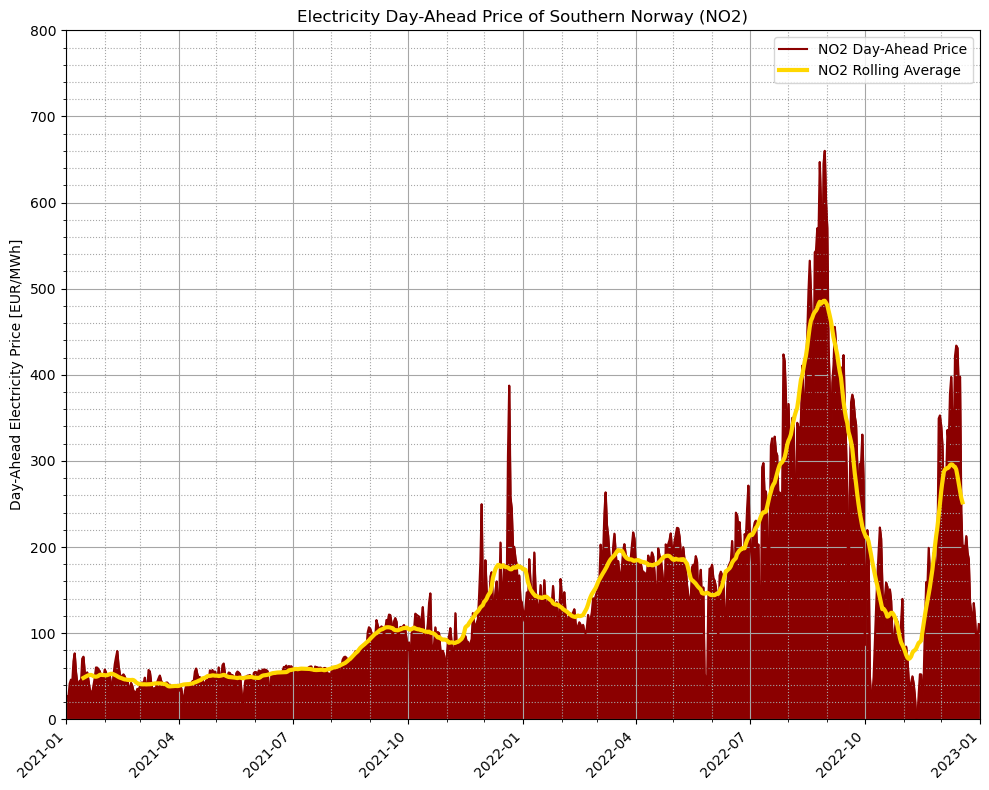

(18628.0, 19358.0)


In [7]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

print(type(BZNO2["BZN|NO2"]))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Electricity Day-Ahead Price of Southern Norway (NO2)')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.plot(BZNO2["Date"], BZNO2["BZN|NO2"], color = "darkred", label="NO2 Day-Ahead Price")
ax.plot(BZNO2["Date"], BZNO2["BZN|NO2"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="NO2 Rolling Average")
plt.fill_between(BZNO2["Date"], BZNO2["BZN|NO2"].astype(float), color="darkred")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#n = 30
#ax.xaxis.set_minor_locator(plt.MultipleLocator(n-3))
#ax.xaxis.set_major_locator(plt.MultipleLocator(n))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

In [8]:
%store BZNO2
del BZNO2

Stored 'BZNO2' (DataFrame)
